In [1]:
import os
import pickle
def create_folder_if_not_exists(folder_path):
    """
    Creates a folder if it does not exist.

    :param folder_path: Path of the folder to create
    """
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder '{folder_path}' created.")
    else:
        print(f"Folder '{folder_path}' already exists.")
        
def file_exists(file_path):
    """
    Checks if a file exists.

    :param file_path: Path of the file to check
    :return: True if the file exists, False otherwise
    """
    return os.path.isfile(file_path)

folder_path = 'synthetique_databases'
create_folder_if_not_exists(folder_path)

def save_dic(d,s):
    with open(s+'.pickle', 'wb') as handle:
        pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def read_dic(s):
    with open(s+'.pickle', 'rb') as handle:
        b = pickle.load(handle)
        return b

Folder 'synthetique_databases' already exists.


In [2]:
def repr(i):
    if type(i) == int:
        return str(i)
    else:
        return str(i[0])+"_"+str(i[1])

In [3]:
import math
nb_nodes = 1024
nb_graphs_er = 5
start = 3
nb_graphs_ba = 3
start_ba = 4
list_grid = [ ( int(math.sqrt(nb_nodes)),int(math.sqrt(nb_nodes))), (4,nb_nodes//4), (16,nb_nodes//16) ]

In [4]:
#generate ER graphs
import networkx as nx

list_er = [i for i in range(start, nb_graphs_er+start)]
for i in list_er:
    g = nx.fast_gnp_random_graph(nb_nodes, (math.log(nb_nodes)*i)/nb_nodes )
    file_path = folder_path + "/er_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    if not file_exists(file_path):
        nx.write_edgelist(g, file_path, data=False)

In [5]:
#generate BA graphs
list_ba = [i for i in range(start_ba, nb_graphs_ba+start_ba)]
for i in list_ba:
    g = nx.barabasi_albert_graph(nb_nodes, i)
    file_path = folder_path + "/ba_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    if not file_exists(file_path):
        nx.write_edgelist(g, file_path, data=False)

In [6]:
#generate grid graph
for i in list_grid:
    g = nx.grid_2d_graph(i[0],i[1])
    g = nx.convert_node_labels_to_integers(g)
    file_path = folder_path + "/gr_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    if not file_exists(file_path):
        nx.write_edgelist(g, file_path, data=False)

In [29]:
l = [("er", i) for i in range(start, nb_graphs_er+start)]
l += [("ba", i) for i in range(start_ba, nb_graphs_ba+start_ba)]
l += [ ("gr", e) for e in list_grid ]

In [8]:
#launch pre-computations
import subprocess
algos = ["linear", "ordered", "binary", "alias"]
j = 0
for x in l:
    i = x[1]
    print(i)
    file_path = folder_path + "/" + x[0] +"_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    #g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    for alg in algos:
        print("filepath : ",file_path)
        subprocess.run(["./main", file_path ,"u", alg, str(0), str(1), str(1), 'c']) 
    j += 1

3
filepath :  synthetique_databases/er_1024_3.edges
Graph name : synthetique_databases/er_1024_3
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.001000 ms.
78 operations.
end queries
filepath :  synthetique_databases/er_1024_3.edges
Graph name : synthetique_databases/er_1024_3
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.002000 ms.
57 operations.
end queries
filepath :  synthetique_databases/er_1024_3.edges
Graph name : synthetique_databases/er_1024_3
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.001000 ms.

Graph name : synthetique_databases/ba_1024_5
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.000000 ms.
19 operations.
end queries
filepath :  synthetique_databases/ba_1024_5.edges
Graph name : synthetique_databases/ba_1024_5
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.001000 ms.
19 operations.
end queries
filepath :  synthetique_databases/ba_1024_5.edges
Graph name : synthetique_databases/ba_1024_5
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.001000 ms.
17 operations.
end queries
filepath :  synthetique_

In [26]:
import random
def random_pairs(n, g, max_tries = 1000):
    V = g.nodes()
    res = []
    nb = 0
    tr = 0
    while nb <n and tr < max_tries:
        lV = list(V)
        pair = random.sample(lV, k = 2)
        if nx.has_path(g,pair[0],pair[1]):
            res.append(pair)
            nb += 1
        tr+=1
    if tr == max_tries:
        return -1
    return res

def random_pairs_exact(n, V):
    res = []
    for i in range(n):
        lV = list(V)
        pair = random.sample(lV, k = 2)
        res.append(pair)
    return res

def read_float_from_file(file_path):
    """
    Reads a single float value from a file.

    :param file_path: Path to the file
    :return: The float value read from the file
    """
    with open(file_path, 'r') as file:
        value = file.readline().strip()
        print("val", value)
        return float(value)
    
    
def read_integer_from_file(file_path):
    """
    Reads a single float value from a file.

    :param file_path: Path to the file
    :return: The float value read from the file
    """
    with open(file_path, 'r') as file:
        value = file.readline().strip()
        print("val", value)
        return int(value)
    
import numpy as np

def calculate_mean_and_std(array, std = True):
    """
    Calculates the mean and standard deviation of an array.

    :param array: Input array
    :return: A tuple containing mean and standard deviation
    """
    mean = np.mean(array)
    if std:
        std_dev = np.std(array)
    else:
        std_dev = 0
    return mean, std_dev

In [10]:
def read_integers_from_file(file_path):
    """
    Reads a file containing one integer on each line into an array.

    :param file_path: Path to the file
    :return: A list of integers read from the file
    """
    integers = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip any whitespace and convert the line to an integer
            integers.append(int(line.strip()))
    return integers

def read_floats_from_file(file_path):
    """
    Reads a file containing one integer on each line into an array.

    :param file_path: Path to the file
    :return: A list of integers read from the file
    """
    doubles = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip any whitespace and convert the line to an integer
            doubles.append(float(line.strip()))
    return doubles

distances = dict()
d_dist = dict()
for x in l:
    i = x[1]
    print(i)
    distances[x[0]+ "_"+repr(i)] = dict()
    d_dist[x[0]+ "_"+repr(i)] = dict()
    for j in range(nb_nodes):
        file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + "_linear/distances_" + str(j) + ".csv"
        ll = read_integers_from_file(file_path)
        for z in range(len(ll)):
            if ll[z] in d_dist[x[0]+ "_"+repr(i)]:
                d_dist[x[0]+ "_"+repr(i)][ll[z]].append((j,z))
            else:
                d_dist[x[0]+ "_"+repr(i)][ll[z]] = [(j,z)]
            distances[x[0]+ "_"+repr(i)][(j,z)] = ll[z]
            distances[x[0]+ "_"+repr(i)][(z,j)] = ll[z]

3
4
5
6
7
4
5
6
(32, 32)
(4, 256)
(16, 64)


In [11]:
#launch simulations on er query time on average
pair_dist = "average"
nb_queries_per_pair = 50000
nb_pairs = 40
import subprocess
algos = ["linear", "ordered", "binary", "alias"]
d = { i: {alg:[]   for alg in algos}  for i in l }
for x in l:
    i = x[1]
    file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    V = list(g.nodes())
    ll = random_pairs(nb_pairs, g)
    if ll == -1:
        print("problem pair sampling")
        break
    for e in ll:
        for alg in algos:
            print(alg, e)
            subprocess.run(["./main", file_path ,"u", alg, e[0], e[1], str(nb_queries_per_pair), "c"])
            file =  x[0]+ "_" + str(nb_nodes) + "_" + repr(i) + "_" + alg + "/queries_operations_"+ str(nb_queries_per_pair) + ".txt"
            d[x][alg].append(read_integer_from_file(folder_path + "/" + file)/(nb_queries_per_pair * distances[x[0]+ "_"+repr(i)][(int(e[0]),int(e[1]))] ))
            

linear ['0', '311']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
8.444000 ms.
1899671 operations.
end queries
val 1899671
ordered ['0', '311']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
7.896000 ms.
1899671 operations.
end queries
val 1899671
binary ['0', '311']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
6.916000 ms.
2300225 operations.
end queries
val 2300225
alias ['0', '311']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
8.472000 ms.
1350000 operations.
end queries
val 1350000
linear ['455', '659']
Graph name : synth

Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
12.876000 ms.
4100333 operations.
end queries
val 4100333
ordered ['612', '962']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
16.263000 ms.
3652445 operations.
end queries
val 3652445
binary ['612', '962']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
11.462000 ms.
3941246 operations.
end queries
val 3941246
alias ['612', '962']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
13.399000 ms.
1850000 operations.
end queries
val 1850000
linear ['650', '539']
Graph name : synthetique_dat

Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
12.940000 ms.
3610836 operations.
end queries
val 3610836
alias ['776', '849']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
19.874000 ms.
1850000 operations.
end queries
val 1850000
linear ['698', '249']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
7.103000 ms.
1724153 operations.
end queries
val 1724153
ordered ['698', '249']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
12.338000 ms.
1724153 operations.
end queries
val 1724153
binary ['698', '249']
Graph name : synthetique_data

Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
17.770000 ms.
1850000 operations.
end queries
val 1850000
linear ['332', '45']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
13.360000 ms.
2498775 operations.
end queries
val 2498775
ordered ['332', '45']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
9.361000 ms.
2498775 operations.
end queries
val 2498775
binary ['332', '45']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
9.310000 ms.
2798633 operations.
end queries
val 2798633
alias ['332', '45']
Graph name : synthetique_databases

Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
10.646000 ms.
1550000 operations.
end queries
val 1550000
ordered ['137', '74']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
6.757000 ms.
1550000 operations.
end queries
val 1550000
binary ['137', '74']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
6.742000 ms.
1350000 operations.
end queries
val 1350000
alias ['137', '74']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
8.316000 ms.
1350000 operations.
end queries
val 1350000
linear ['515', '303']
Graph name : synthetique_databases

valGraph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
6.627000 ms.
1924997 operations.
end queries
 1924997
alias ['256', '469']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
8.666000 ms.
1350000 operations.
end queries
val 1350000
linear ['719', '655']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
10.671000 ms.
3777185 operations.
end queries
val 3777185
ordered ['719', '655']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
10.881000 ms.
3777185 operations.
end queries
val 3777185
binary ['719', '655']
Graph name : synthetique_datab

Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
7.306000 ms.
1725119 operations.
end queries
val 1725119
ordered ['474', '859']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
7.211000 ms.
1725119 operations.
end queries
val 1725119
binary ['474', '859']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
6.617000 ms.
1925051 operations.
end queries
val 1925051
alias ['474', '859']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
8.341000 ms.
1350000 operations.
end queries
val 1350000
linear ['894', '887']
Graph name : synthetique_databas

Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
15.957000 ms.
1850000 operations.
end queries
val 1850000
linear ['322', '505']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
7.054000 ms.
1550000 operations.
end queries
val 1550000
ordered ['322', '505']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
6.577000 ms.
1550000 operations.
end queries
val 1550000
binary ['322', '505']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
6.372000 ms.
1350000 operations.
end queries
val 1350000
alias ['322', '505']
Graph name : synthetique_databa

Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
8.844000 ms.
1350000 operations.
end queries
val 1350000
linear ['989', '814']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
12.797000 ms.
4371527 operations.
end queries
val 4371527
ordered ['989', '814']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
10.850000 ms.
4137111 operations.
end queries
val 4137111
binary ['989', '814']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
10.676000 ms.
4238754 operations.
end queries
val 4238754
alias ['989', '814']
Graph name : synthetique_data

Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
12.714000 ms.
4983611 operations.
end queries
val 4983611
alias ['1000', '508']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
13.491000 ms.
1850000 operations.
end queries
val 1850000
linear ['663', '674']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
4.200000 ms.
950000 operations.
end queries
val 950000
ordered ['663', '674']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
3.851000 ms.
950000 operations.
end queries
val 950000
binary ['663', '674']
Graph name : synthetique_database

Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
9.076000 ms.
1925138 operations.
end queries
val 1925138
alias ['498', '10']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
8.557000 ms.
1350000 operations.
end queries
val 1350000
linear ['238', '653']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
6.807000 ms.
1899706 operations.
end queries
val 1899706
ordered ['238', '653']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
7.191000 ms.
1899706 operations.
end queries
val 1899706
binary ['238', '653']
Graph name : synthetique_database

Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
12.907000 ms.
1724699 operations.
end queries
val 1724699
ordered ['1014', '123']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
9.170000 ms.
1724699 operations.
end queries
val 1724699
binary ['1014', '123']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
7.583000 ms.
1924871 operations.
end queries
val 1924871
alias ['1014', '123']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
8.223000 ms.
1350000 operations.
end queries
val 1350000
linear ['921', '62']
Graph name : synthetique_data

Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
7.782000 ms.
1550000 operations.
end queries
val 1550000
ordered ['974', '184']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
9.303000 ms.
1550000 operations.
end queries
val 1550000
binary ['974', '184']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
6.616000 ms.
1350000 operations.
end queries
val 1350000
alias ['974', '184']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
9.729000 ms.
1350000 operations.
end queries
val 1350000
linear ['970', '802']
Graph name : synthetique_databas

Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
6.769000 ms.
1550000 operations.
end queries
val 1550000
ordered ['44', '448']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
6.258000 ms.
1550000 operations.
end queries
val 1550000
binary ['44', '448']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
6.202000 ms.
1350000 operations.
end queries
val 1350000
alias ['44', '448']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
8.189000 ms.
1350000 operations.
end queries
val 1350000
linear ['514', '501']
Graph name : synthetique_databases/

Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
14.144000 ms.
1724503 operations.
end queries
val 1724503
ordered ['844', '522']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
8.149000 ms.
1724503 operations.
end queries
val 1724503
binary ['844', '522']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
6.554000 ms.
1924787 operations.
end queries
val 1924787
alias ['844', '522']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
8.221000 ms.
1350000 operations.
end queries
val 1350000
linear ['236', '1017']
Graph name : synthetique_datab

Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
12.741000 ms.
5317603 operations.
end queries
val 5317603
alias ['276', '908']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
12.162000 ms.
1850000 operations.
end queries
val 1850000
linear ['55', '694']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
6.900000 ms.
1901092 operations.
end queries
val 1901092
ordered ['55', '694']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
6.722000 ms.
1901092 operations.
end queries
val 1901092
binary ['55', '694']
Graph name : synthetique_database

Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
9.199000 ms.
1902394 operations.
end queries
val 1902394
ordered ['913', '889']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
6.840000 ms.
1902394 operations.
end queries
val 1902394
binary ['913', '889']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
6.844000 ms.
2303218 operations.
end queries
val 2303218
alias ['913', '889']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
8.125000 ms.
1350000 operations.
end queries
val 1350000
linear ['296', '175']
Graph name : synthetique_databas

Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
17.394000 ms.
9452106 operations.
end queries
val 9452106
ordered ['291', '598']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
13.385000 ms.
7998892 operations.
end queries
val 7998892
binary ['291', '598']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
12.141000 ms.
5719102 operations.
end queries
val 5719102
alias ['291', '598']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
11.744000 ms.
1850000 operations.
end queries
val 1850000
linear ['471', '185']
Graph name : synthetique_dat

Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
6.873000 ms.
1550000 operations.
end queries
val 1550000
binary ['733', '290']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
7.066000 ms.
1350000 operations.
end queries
val 1350000
alias ['733', '290']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
8.176000 ms.
1350000 operations.
end queries
val 1350000
linear ['334', '353']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
6.495000 ms.
1724888 operations.
end queries
val 1724888
ordered ['334', '353']
Graph name : synthetique_databas

Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
11.161000 ms.
1350000 operations.
end queries
val 1350000
linear ['404', '311']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
6.975000 ms.
2074958 operations.
end queries
val 2074958
ordered ['404', '311']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
7.311000 ms.
2074958 operations.
end queries
val 2074958
binary ['404', '311']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
6.959000 ms.
2474981 operations.
end queries
val 2474981
alias ['404', '311']
Graph name : synthetique_databa

Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
16.984000 ms.
7745079 operations.
end queries
val 7745079
ordered ['899', '116']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
14.925000 ms.
6512022 operations.
end queries
val 6512022
binary ['899', '116']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
11.751000 ms.
5202468 operations.
end queries
val 5202468
alias ['899', '116']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
11.688000 ms.
1850000 operations.
end queries
val 1850000
linear ['686', '302']
Graph name : synthetique_dat

Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
22.212000 ms.
2350000 operations.
end queries
val 2350000
linear ['10', '354']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
8.771000 ms.
1550000 operations.
end queries
val 1550000
ordered ['10', '354']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
6.832000 ms.
1550000 operations.
end queries
val 1550000
binary ['10', '354']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
7.462000 ms.
1350000 operations.
end queries
val 1350000
alias ['10', '354']
Graph name : synthetique_databases/

Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
19.134000 ms.
4162579 operations.
end queries
val 4162579
binary ['938', '163']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
15.288000 ms.
4629786 operations.
end queries
val 4629786
alias ['938', '163']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
17.551000 ms.
2350000 operations.
end queries
val 2350000
linear ['343', '955']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
8.623000 ms.
2150000 operations.
end queries
val 2150000
ordered ['343', '955']
Graph name : synthetique_data

Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
14.450000 ms.
3409561 operations.
end queries
val 3409561
binary ['301', '321']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
16.824000 ms.
4118587 operations.
end queries
val 4118587
alias ['301', '321']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
15.606000 ms.
2350000 operations.
end queries
val 2350000
linear ['841', '322']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
9.270000 ms.
2323964 operations.
end queries
val 2323964
ordered ['841', '322']
Graph name : synthetique_data

Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
16.626000 ms.
4844610 operations.
end queries
val 4844610
ordered ['732', '619']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
13.688000 ms.
4844610 operations.
end queries
val 4844610
binary ['732', '619']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
13.510000 ms.
4987683 operations.
end queries
val 4987683
alias ['732', '619']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
15.874000 ms.
2350000 operations.
end queries
val 2350000
linear ['858', '711']
Graph name : synthetique_dat

val 3095243
alias ['32', '543']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
16.616000 ms.
1850000 operations.
end queries
val 1850000
linear ['463', '533']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
9.367000 ms.
2324398 operations.
end queries
val 2324398
ordered ['463', '533']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
10.226000 ms.
2324398 operations.
end queries
val 2324398
binary ['463', '533']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
9.265000 ms.
2424742 operations.
end queries
val 2424742
alias ['463', '533'

Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
14.347000 ms.
2424436 operations.
end queries
val 2424436
alias ['888', '624']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
12.549000 ms.
1850000 operations.
end queries
val 1850000
linear ['512', '668']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
11.054000 ms.
2150000 operations.
end queries
val 2150000
ordered ['512', '668']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
11.773000 ms.
2150000 operations.
end queries
val 2150000
binary ['512', '668']
Graph name : synthetique_dat

Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
11.114000 ms.
2384605 operations.
end queries
val 2384605
ordered ['110', '798']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
11.595000 ms.
2384605 operations.
end queries
val 2384605
binary ['110', '798']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
11.759000 ms.
2976063 operations.
end queries
val 2976063
alias ['110', '798']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
13.063000 ms.
1850000 operations.
end queries
val 1850000
linear ['38', '1000']
Graph name : synthetique_dat

Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
16.184000 ms.
2674818 operations.
end queries
val 2674818
ordered ['885', '291']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
11.523000 ms.
2674818 operations.
end queries
val 2674818
binary ['885', '291']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
9.419000 ms.
2975047 operations.
end queries
val 2975047
alias ['885', '291']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
11.747000 ms.
1850000 operations.
end queries
val 1850000
linear ['713', '498']
Graph name : synthetique_data

Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
9.045000 ms.
2326372 operations.
end queries
val 2326372
ordered ['137', '963']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
12.825000 ms.
2326372 operations.
end queries
val 2326372
binary ['137', '963']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
9.192000 ms.
2425588 operations.
end queries
val 2425588
alias ['137', '963']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
12.694000 ms.
1850000 operations.
end queries
val 1850000
linear ['355', '856']
Graph name : synthetique_datab

Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
11.352000 ms.
2975035 operations.
end queries
val 2975035
alias ['832', '275']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
12.380000 ms.
1850000 operations.
end queries
val 1850000
linear ['451', '729']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
13.963000 ms.
5467407 operations.
end queries
val 5467407
ordered ['451', '729']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
13.672000 ms.
5307268 operations.
end queries
val 5307268
binary ['451', '729']
Graph name : synthetique_dat

Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
11.474000 ms.
2425042 operations.
end queries
val 2425042
alias ['212', '487']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
14.776000 ms.
1850000 operations.
end queries
val 1850000
linear ['399', '994']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
13.554000 ms.
4429622 operations.
end queries
val 4429622
ordered ['399', '994']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
15.029000 ms.
4136287 operations.
end queries
val 4136287
binary ['399', '994']
Graph name : synthetique_dat

Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
12.464000 ms.
1550000 operations.
end queries
val 1550000
binary ['192', '329']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
9.222000 ms.
1350000 operations.
end queries
val 1350000
alias ['192', '329']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
8.499000 ms.
1350000 operations.
end queries
val 1350000
linear ['169', '843']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
9.578000 ms.
2616340 operations.
end queries
val 2616340
ordered ['169', '843']
Graph name : synthetique_databa

Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
10.981000 ms.
1550000 operations.
end queries
val 1550000
binary ['751', '680']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
6.243000 ms.
1350000 operations.
end queries
val 1350000
alias ['751', '680']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
9.691000 ms.
1350000 operations.
end queries
val 1350000
linear ['254', '958']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
55.366000 ms.
13550000 operations.
end queries
val 13550000
ordered ['254', '958']
Graph name : synthetique

Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
45.526000 ms.
10419292 operations.
end queries
val 10419292
alias ['470', '621']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
49.514000 ms.
7350000 operations.
end queries
val 7350000
linear ['295', '1000']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
59.021000 ms.
18009373 operations.
end queries
val 18009373
ordered ['295', '1000']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
57.860000 ms.
14484572 operations.
end queries
val 14484572
binary ['295', '1000']
Gra

Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
54.619000 ms.
12436341 operations.
end queries
val 12436341
binary ['508', '622']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
47.189000 ms.
11861362 operations.
end queries
val 11861362
alias ['508', '622']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
63.100000 ms.
9350000 operations.
end queries
val 9350000
linear ['386', '435']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
45.913000 ms.
11480491 operations.
end queries
val 11480491
ordered ['386', '435']
Graph 

Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
96.511000 ms.
28781067 operations.
end queries
val 28781067
ordered ['914', '166']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
98.319000 ms.
25253963 operations.
end queries
val 25253963
binary ['914', '166']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
89.690000 ms.
25273326 operations.
end queries
val 25273326
alias ['914', '166']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
127.486000 ms.
17850000 operations.
end queries
val 17850000
linear ['698', '720']
Gra

Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
83.564000 ms.
11350000 operations.
end queries
val 11350000
linear ['738', '440']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
86.348000 ms.
22896112 operations.
end queries
val 22896112
ordered ['738', '440']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
84.017000 ms.
22814464 operations.
end queries
val 22814464
binary ['738', '440']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
97.306000 ms.
29043881 operations.
end queries
val 29043881
alias ['738', '440']
Grap

Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
218.590000 ms.
54788051 operations.
end queries
val 54788051
ordered ['55', '909']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
219.260000 ms.
54787736 operations.
end queries
val 54787736
binary ['55', '909']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
239.015000 ms.
89310664 operations.
end queries
val 89310664
alias ['55', '909']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
314.579000 ms.
44850000 operations.
end queries
val 44850000
linear ['351', '925']
Gra

Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
337.116000 ms.
81097361 operations.
end queries
val 81097361
binary ['180', '303']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
337.033000 ms.
67998866 operations.
end queries
val 67998866
alias ['180', '303']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
464.199000 ms.
67350000 operations.
end queries
val 67350000
linear ['391', '15']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
303.342000 ms.
73297235 operations.
end queries
val 73297235
ordered ['391', '15']
Gr

Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
163.718000 ms.
22850000 operations.
end queries
val 22850000
linear ['58', '932']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
271.776000 ms.
66790144 operations.
end queries
val 66790144
ordered ['58', '932']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
310.212000 ms.
66789997 operations.
end queries
val 66789997
binary ['58', '932']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
290.978000 ms.
109399194 operations.
end queries
val 109399194
alias ['58', '932']
Gr

Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
220.247000 ms.
43895373 operations.
end queries
val 43895373
binary ['397', '724']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
188.196000 ms.
72428991 operations.
end queries
val 72428991
alias ['397', '724']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
255.203000 ms.
36350000 operations.
end queries
val 36350000
linear ['282', '734']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
482.449000 ms.
118898264 operations.
end queries
val 118898264
ordered ['282', '734'

Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
230.026000 ms.
46850000 operations.
end queries
val 46850000
alias ['102', '9']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
317.712000 ms.
46850000 operations.
end queries
val 46850000
linear ['46', '345']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
108.151000 ms.
27091677 operations.
end queries
val 27091677
ordered ['46', '345']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
117.320000 ms.
27091677 operations.
end queries
val 27091677
binary ['46', '345']
Graph

Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
181.017000 ms.
25350000 operations.
end queries
val 25350000
linear ['694', '7']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
149.345000 ms.
37976738 operations.
end queries
val 37976738
ordered ['694', '7']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
152.857000 ms.
37961702 operations.
end queries
val 37961702
binary ['694', '7']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
154.319000 ms.
54901908 operations.
end queries
val 54901908
alias ['694', '7']
Graph na

Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
183.671000 ms.
45792012 operations.
end queries
val 45792012
ordered ['770', '190']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
177.812000 ms.
45782009 operations.
end queries
val 45782009
binary ['770', '190']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
192.675000 ms.
68207833 operations.
end queries
val 68207833
alias ['770', '190']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
266.738000 ms.
35350000 operations.
end queries
val 35350000
linear ['639', '80']
G

Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
75.725000 ms.
9850000 operations.
end queries
val 9850000
linear ['506', '620']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
44.233000 ms.
13224915 operations.
end queries
val 13224915
ordered ['506', '620']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
41.502000 ms.
10600776 operations.
end queries
val 10600776
binary ['506', '620']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
40.635000 ms.
9621644 operations.
end queries
val 9621644
alias ['506', '620']
Graph na

Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
90.680000 ms.
23525686 operations.
end queries
val 23525686
ordered ['291', '977']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
77.214000 ms.
21233627 operations.
end queries
val 21233627
binary ['291', '977']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
76.950000 ms.
21609508 operations.
end queries
val 21609508
alias ['291', '977']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
114.132000 ms.
14850000 operations.
end queries
val 14850000
linear ['993', '355']
val

Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
108.290000 ms.
24743388 operations.
end queries
val 24743388
alias ['922', '752']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
100.196000 ms.
12850000 operations.
end queries
val 12850000
linear ['432', '35']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
50.880000 ms.
13699192 operations.
end queries
val 13699192
ordered ['432', '35']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
56.530000 ms.
13633546 operations.
end queries
val 13633546
binary ['432', '35']
Graph

In [12]:
# #launch simulations on er query time on long distance
# # last third of distances
# pair_dist = "long"
# max_dist = { i: max(d_dist[x[0]+ "_"+repr(x[1])])  for x in l  }


# nb_queries_per_pair = 500000
# nb_pairs = 30
# import subprocess
# algos = ["linear", "ordered", "binary", "alias"]
# d = { i: {alg:[]   for alg in algos}  for i in l }

# for x in l:
#     i = x[1]
#     file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
#     g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
#     V = list(g.nodes())
#     pairs = []
#     if pair_dist == "long":
#         for zz in range(int(max_dist[i]*2/3), max_dist[i]):
#             pairs += d_dist[i][zz]
#     if pair_dist == "medium":
#         for zz in range(int(max_dist[i]*1/3), max_dist[i]*2/3):
#             pairs += d_dist[i][zz]
#     if pair_dist == "short":
#         for zz in range(int(max_dist[i]), max_dist[i]*1/3):
#             pairs += d_dist[i][zz]
#     ll = random_pairs_exact(nb_pairs, pairs)
#     if ll == -1:
#         print("problem pair sampling")
#         break
#     for e in ll:
#         for alg in algos:
#             subprocess.run(["./main", file_path ,"u", alg, str(e[0]), str(e[1]), str(nb_queries_per_pair), "c"])
#             file = "er_" + str(nb_nodes) + "_" + str(i) + "_" + alg + "/queries_operations_"+ str(nb_queries_per_pair) + ".txt"
#             d[x][alg].append(read_integer_from_file(folder_path + "/" + file))
            

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_chart(data, xlabel, ylabel, legend, filename, dim1 = 8, dim2 = 5, bar_w = 0.15):
    """
    Plots a bar chart where the x-axis is represented by the keys of the dictionary.
    Each key in the dictionary maps to another dictionary with 4 keys representing bars.
    The values are tuples (mean, standard deviation).

    :param data: Dictionary containing the data to plot
    """

    categories = list(data.keys())
    subcategories = list(next(iter(data.values())).keys())
    
    # Number of groups and bars per group
    n_groups = len(categories)
    n_bars = len(subcategories)
    
    fig, ax = plt.subplots(figsize=(dim1, dim2))
    
    # Create figure and axis
    #fig, ax = plt.subplots()

    # Bar width
    bar_width = bar_w

    # X locations for the groups
    index = np.arange(n_groups)
    
    # Iterate through each subcategory and plot the bars
    for i, subcategory in enumerate(subcategories):
        means = [data[category][subcategory][0] for category in categories]
        std_devs = [data[category][subcategory][1] for category in categories]
        ax.bar(index + i * bar_width, means, bar_width, yerr=std_devs, label=subcategory)

    # Add labels, title, and legend
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(legend)
    ax.set_xticks(index + bar_width * (n_bars - 1) / 2)
    ax.set_xticklabels(categories)
    ax.legend()


    # Show plot
    plt.rcParams.update({'font.size': 13})
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

# # Example usage:
# data = {
#     'A': {'bar1': (5, 1), 'bar2': (6, 1.5), 'bar3': (7, 2), 'bar4': (8, 2.5)},
#     'B': {'bar1': (4, 1.2), 'bar2': (5, 1.3), 'bar3': (6, 1.8), 'bar4': (7, 2.1)},
#     'C': {'bar1': (3, 0.8), 'bar2': (4, 1.1), 'bar3': (5, 1.6), 'bar4': (6, 2.0)}
# }

# data = {i:  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in list_p}

# plot_bar_chart(data)

In [15]:
def name(i):
    if i[0] != "gr":
        return i[0]+"_"+str(i[1])
    else:
        return str(i[1][0])+"_"+str(i[1][1])

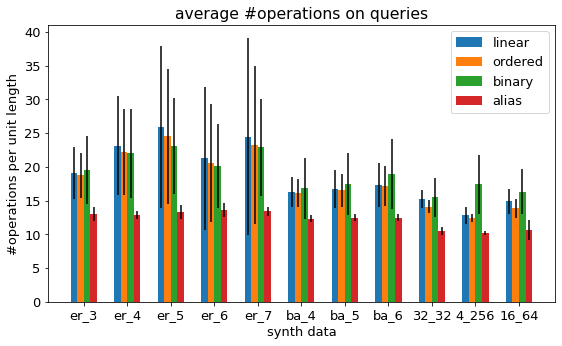

In [30]:
data = {name(i):  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in l}
save_dic(data,"queries_synth")
plot_bar_chart(data, "synth data", "#operations per unit length", "average #operations on queries", "queries_synth.pdf")

In [16]:
# data = {i:  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in l if i[0]!="gr"}
# plot_bar_chart(data, "synth data", "#operations", "average #operations on queries", "queries2.pdf")

In [17]:
l = [("er", i) for i in range(start, nb_graphs_er+start)]
l += [("ba", i) for i in range(start_ba, nb_graphs_ba+start_ba)]
l += [ ("gr", e) for e in list_grid ]

In [18]:
#launch bars on pre-computations
import subprocess
algos = ["linear", "ordered", "binary", "alias"]
d_pre = { i: {alg:[]   for alg in algos}  for i in l }
for x in l:
    i = x[1]
    for alg in algos:
        file =  x[0] +  "_" + str(nb_nodes) + "_" + repr(i) + "_" + alg + "/pre_time.csv"
        ll = read_integers_from_file(folder_path+"/"+file)
        d_pre[x][alg] = ll

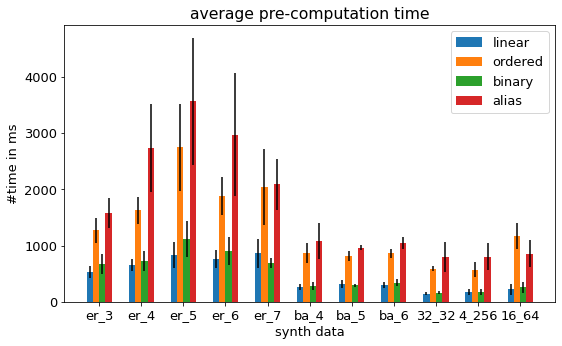

In [32]:
data = {name(i):  { e: calculate_mean_and_std(d_pre[i][e])   for e in algos }  for i in l}
save_dic(data,"pre_computation_synth")
plot_bar_chart(data, "synth data", "#time in ms", "average pre-computation time", "pre_comp_synth.pdf")

In [20]:
# data = {i[0]+"_"+repr(i[1]):  { e: calculate_mean_and_std(d_pre[i][e])   for e in algos }  for i in l if i[0]!="gr"}
# plot_bar_chart(data, "er, p = (xlog(n)/n)", "#time in ms", "average pre-computation time", "pre_comp2.pdf")

In [9]:
def construct_dag(l):
    g = nx.DiGraph()
    for e in l:
        for i in range(1,len(e)):
            if (e[i-1],e[i]) not in g.edges:
                g.add_edge(e[i-1],e[i])
    return g
def connected_gnp(n,p, max_tries = 10, directed = False):
    i = 0
    while i < max_tries:
        g = nx.fast_gnp_random_graph(N, p, directed=directed)
        if nx.is_connected(g):
            return g
        i += 1
    return None

def random_pairs_more_sh(g, V, max_tries = 10):
    i = 0
    while i < max_tries:
        lV = list(V)
        pair = random.sample(lV, k = 2)
        l = list(map(lambda x:tuple(x), nx.all_shortest_paths(g, source=pair[0], target=pair[1])))
        if len(l) > 1:
            return l, pair
        i += 1
    return None


from math import prod
def prob_URW(dag, w):
    return prod( 1/dag.in_degree(w[i])  for i in range(1,len(w)))
def dist_URW(dag, l):
    return list(map( lambda x : prob_URW(dag, x), l ))

def random_weights(g,s,t):
    h = g.copy()
    n = len(g.nodes())
    for e in h.edges():
        h[e[0]][e[1]]['weight'] = 1 + random.uniform(-1/n,1/n)
    return nx.dijkstra_path(h, s, t, weight='weight')

def stat_random_weights(g,s,t,l, nb = 100):
    d = dict()
    for _ in range(nb):
        e = random_weights(g,s,t)
        te = tuple(e)
        if te in d:
            d[te] += 1
        else:
            d[te] = 1
    res = []
    for e in l:
        if e in d:
            res.append(d[e]/nb)
        else:
            res.append(0)
    return res
    

In [10]:
import networkx as nx
l = [("er", i) for i in range(start, nb_graphs_er+start)]
l += [("ba", i) for i in range(start_ba, nb_graphs_ba+start_ba)]
# l += [ ("gr", e) for e in list_grid ]

In [11]:
from scipy.stats import wasserstein_distance
#launch simulations on biased algos
pair_dist = "average"
nb_pairs = 5
import subprocess
algos = ["random_weights", "URW"]
d_was = { i: {alg:[]   for alg in algos}  for i in l }
for x in l:
    print(x)
    i = x[1]
    file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    V = list(g.nodes())
    ll = random_pairs(nb_pairs, g)
    if ll == -1:
        print("problem pair sampling")
        break
    for e in ll:
        for alg in algos: 
            file =  x[0]+ "_" + str(nb_nodes) + "_" + repr(i) + "_" + "linear" + "/"+ e[0] + ".edges"
            dag = nx.read_edgelist(folder_path + "/" + file, create_using=nx.DiGraph, data=False)
            sl = list(map(lambda x:tuple(x), nx.all_shortest_paths(g, source=e[0], target=e[1])))
            print("nb shortest", len(sl))
            if alg == "random_weights":
                res = stat_random_weights(g,e[0],e[1],sl, nb = len(sl)*10)
            else:
                res = dist_URW(dag, sl )
            res_unif = [ 1/len(sl) for e in sl ]
            wr = wasserstein_distance(res_unif, res)
            print(alg, wr)
            d_was[x][alg].append(wr)
            

('er', 3)
nb shortest 9
random_weights 0.022222222222222223
nb shortest 9
URW 0.02160493827160494
nb shortest 13
random_weights 0.01893491124260355
nb shortest 13
URW 0.019365250134480903
nb shortest 4
random_weights 0.037500000000000006
nb shortest 4
URW 0.0
nb shortest 1
random_weights 0.0
nb shortest 1
URW 0.0
nb shortest 1
random_weights 0.0
nb shortest 1
URW 0.0
('er', 4)
nb shortest 21
random_weights 0.015873015873015872
nb shortest 21
URW 0.014939309056956116
nb shortest 1
random_weights 0.0
nb shortest 1
URW 0.0
nb shortest 15
random_weights 0.02044444444444445
nb shortest 15
URW 0.019999999999999997
nb shortest 1
random_weights 0.0
nb shortest 1
URW 0.0
nb shortest 4
random_weights 0.0375
nb shortest 4
URW 0.0
('er', 5)
nb shortest 2
random_weights 0.05000000000000002
nb shortest 2
URW 0.0
nb shortest 1
random_weights 0.0
nb shortest 1
URW 0.0
nb shortest 69
random_weights 0.002982566687670658
nb shortest 69
URW 0.006064902331442975
nb shortest 45
random_weights 0.006024691358

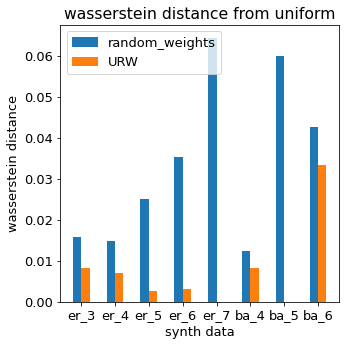

In [30]:
data = {name(i):  { e: calculate_mean_and_std(d_was[i][e], std = False)   for e in algos }  for i in l}
save_dic(data,"bias_synth")
plot_bar_chart(data, "synth data", "wasserstein distance", "wasserstein distance from uniform", "biase_more_one.pdf", dim1 = 5, dim2 = 5, bar_w = 0.25)

In [106]:
# from scipy.stats import wasserstein_distance
# #launch simulations on biased algos with more than one sp
# pair_dist = "average"
# nb_pairs = 30
# import subprocess
# algos = ["random_weights", "URW"]
# d_was_1 = { i: {alg:[]   for alg in algos}  for i in l }
# for x in l:
#     print(x)
#     i = x[1]
#     file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
#     g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
#     nb_effective = 0
#     while nb_effective < nb_pairs:    
#         ll = random_pairs(1, g)
#         if ll == -1:
#             print("problem pair sampling")
#             break
#         e = ll[0]
#         file =  x[0]+ "_" + str(nb_nodes) + "_" + repr(i) + "_" + "linear" + "/"+ e[0] + ".edges"
#         dag = nx.read_edgelist(folder_path + "/" + file, create_using=nx.DiGraph, data=False)
#         sl = list(map(lambda x:tuple(x), nx.all_shortest_paths(g, source=e[0], target=e[1])))
#         print("nb shortest", len(sl))
#         if len(sl) != 1:
#             nb_effective += 1
#         else:
#             continue
#         for alg in algos:
#             print("entered")
#             if alg == "random_weights":
#                 res = stat_random_weights(g,e[0],e[1],sl, nb = len(sl)*10)
#             else:
#                 res = dist_URW(dag, sl )
#             res_unif = [ 1/len(sl) for e in sl ]
#             wr = wasserstein_distance(res_unif, res)
#             print(alg, wr)
#             d_was_1[x][alg].append(wr)


In [107]:
# data = {name(i):  { e: calculate_mean_and_std(d_was_1[i][e])   for e in algos }  for i in l}
# plot_bar_chart(data, "synth data", "wasserstein distance", "wasserstein distance from uniform", "biase_more_one.pdf", dim1 = 5, dim2 = 5, bar_w = 0.25)

In [25]:
def get_folder_size(folder_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            if os.path.isfile(file_path):
                total_size += os.path.getsize(file_path)
    return total_size

In [33]:
l = [("er", i) for i in range(start, nb_graphs_er+start)]
l += [("ba", i) for i in range(start_ba, nb_graphs_ba+start_ba)]
l += [ ("gr", e) for e in list_grid ]

In [34]:
memory = dict()
algos = ["linear", "ordered", "binary", "alias"]
#launch bars on pre-computations
import subprocess
memory = { i: {alg:[]   for alg in algos}  for i in l }
for x in l:
    for alg in algos:
        file =  x[0] +"_" + str(nb_nodes) + "_" + repr(x[1]) + "_" + alg
        subprocess.Popen("rm " + folder_path+"/"+file+"/"+"queries*", shell=True,
                                    stdout=subprocess.PIPE,
                                    stderr=subprocess.PIPE)
        subprocess.run(["mv", folder_path+"/"+file+"/"+"pre_time.csv", folder_path+"/"])
        memory[x][alg] = [get_folder_size(folder_path+"/"+file)]
        subprocess.run(["mv", folder_path + "/" + "pre_time.csv", folder_path+"/"+file+"/"])

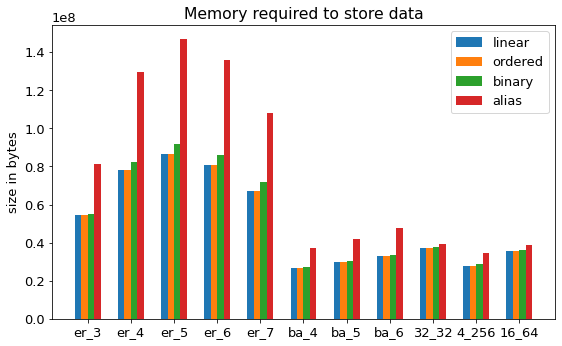

In [36]:
data = {name(i):  { e: calculate_mean_and_std(memory[i][e])   for e in algos }  for i in l}
save_dic(data,"memory_synth")

plot_bar_chart(data, "", "size in bytes", "Memory required to store data", "memory_synth.pdf",  bar_w = 0.15)